## LAB1: Gerações, representações e transformações de dados multivariados

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Ana Sofia Oliveira
## Número: 39275

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab1.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.
# Ficheiros que não se encontrem em conformidade com o formato especificado não serão corrigidos!

<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
rd.seed(42)

# Pergunta 1:
## a) Gere 5000 (cinco mil) pontos a duas dimensões, uniformemente distribuídos entre [-1+3] na primeira dimensão, e entre [+2,+4]  na segunda dimensão. Os pontos gerados deverão estar numa matriz $X$ de $2\times5000$.
## b) Visualize os pontos gerados. Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala.

(-2.0, 5.0, -2.0, 5.0)

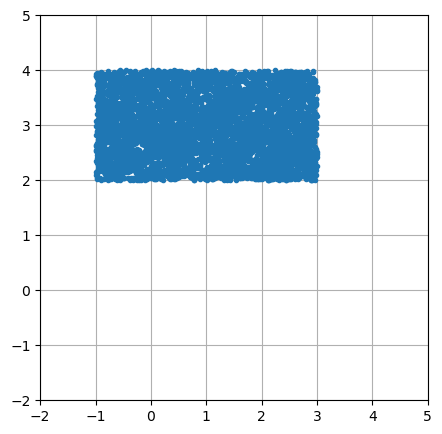

In [2]:
N = 5000
X = np.vstack((np.random.rand(N)*4-1, np.random.rand(N)*2+2))

plt.figure(figsize=(5,5))
plt.plot(X[0, :], X[1, :], '.')
plt.grid(True)
plt.axis([-2, 5, -2, 5])


# Pergunta 2:
## a) Através duma transformação matricial do tipo $X2=A\times X + b$ ($A$ matriz de $2\times2$, e $b$ vetor bi-dimensional), escale a primeira dimensão dos dados por um fator de 0.5, escale a segunda dimensão dos dados por um fator de 2, e faça uma translação dos dados de modo a estes terem média nula.
## b) Através duma transformação matricial do tipo $X3=B\times X2$ (B matriz de $2\times2$), faça uma rotação aos dados da matrix $X2$, de 30 graus no sentido contrário ao dos ponteiros do relógio.
## c) Visualize os pontos gerados (matriz $X3$), conjuntamento com os dados originiais (matriz $X$). Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala. 

(-3.0, 5.0, -3.0, 5.0)

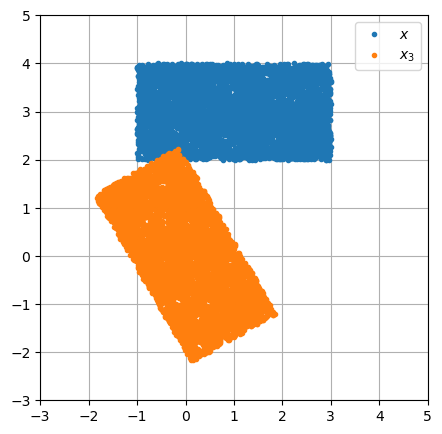

In [3]:
A = np.array([[0.5, 0],[0, 2]])

X2 = np.dot(A, X)
b = np.mean(X2, axis=1)

X2 = X2 - b[:, np.newaxis]

ang = np.pi/6
B = np.array([[np.cos(ang), -np.sin(ang)],[np.sin(ang), np.cos(ang)]])

X3 = np.dot(B, X2)

plt.figure(figsize=(5,5))
plt.plot(X[0, :], X[1, :], '.', X3[0, :], X3[1, :], '.')
plt.legend(['$x$', '$x_3$'])
plt.grid(True)
plt.axis([-3, 5, -3, 5])


# Pergunta 3:

## Considere uma matriz $X4$ de $2\times10000$ obtida com a concatenação das matrizes $X$ e $X3$. Faça os histogramas de cada dimensão dos dados da matriz $X4$. Certifique-se que o número de intervalos é apropriado, e a sua largura também, para uma boa visualização dos mesmos.


-1.8208204355842859 |  2.9988706931445224
-2.1588309085708515 |  3.999010379417033


Text(0.5, 1.0, 'X4 - histograma 2ªdimensão')

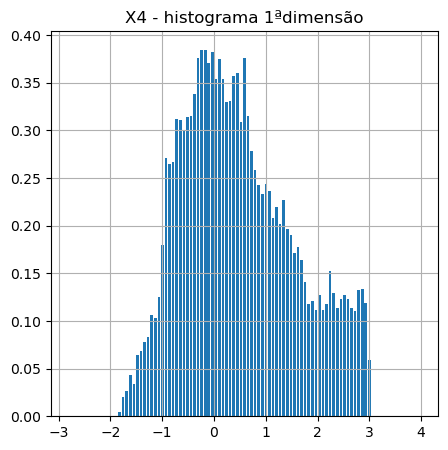

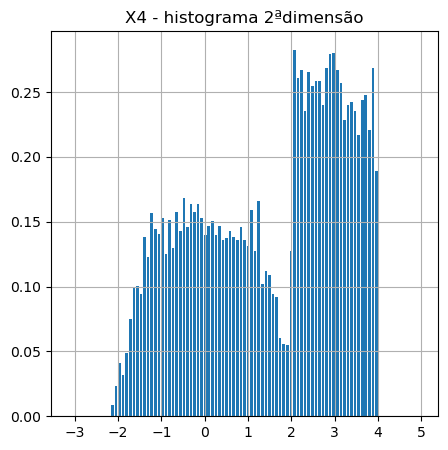

In [50]:
X4 = np.hstack((X, X3))

print(np.min(X4[0, :]), "| ", np.max(X4[0, :])) # min d1: -2; max d1: 3
print(np.min(X4[1, :]), "| ", np.max(X4[1, :])) # min d2: -3; max d2: 4

h1, b1 = np.histogram(X4[0, :], np.linspace(np.min(X4[0, :])-1, np.max(X4[0, :])+1, 100), density=True)
b1 = (b1[1:] + b1[:-1])/2.

plt.figure(figsize=(5,5))
plt.bar(b1, h1, width=0.05)
plt.grid(True)
plt.title("X4 - histograma 1ªdimensão")


h2, b2 = np.histogram(X4[1, :], np.linspace(np.min(X4[1, :])-1, np.max(X4[1, :])+1, 100), density=True)
b2 = (b2[1:] + b2[:-1])/2.

plt.figure(figsize=(5,5))
plt.bar(b2, h2, width=0.06)
plt.grid(True)
plt.title("X4 - histograma 2ªdimensão")

